## Loss Functions

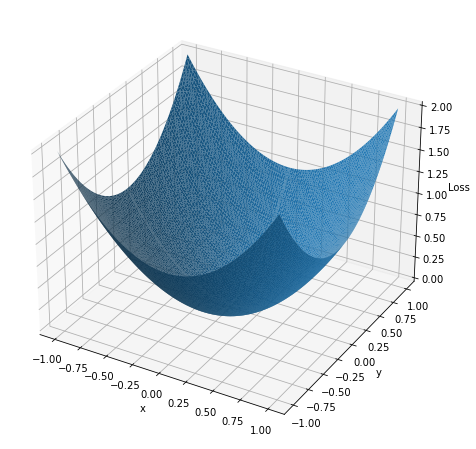

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z =  x**2 + y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True)
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

# fig.savefig('chapter5_plot1.pdf')

plt.show()

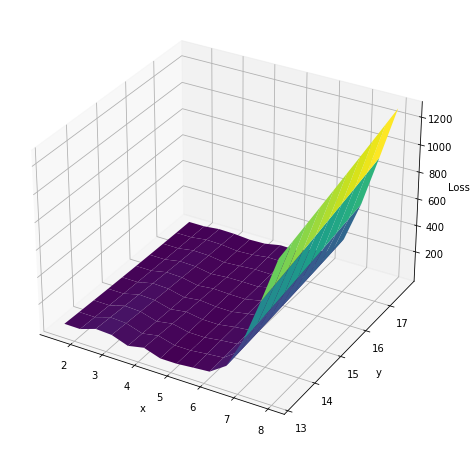

In [42]:
X = np.linspace(1.5, 8.5, num = 14)
Y = 16 + 4.2*X + np.random.normal(size = 14, loc = 0, scale = 2)

x = np.arange(1.5, 8.5, 0.5)
y = np.arange(13.2, 18, 0.5)
x, y = np.meshgrid(x, y)

# # Compute z to make the pringle surface.
z_pred = y + x*X
loss = np.power((z_pred - Y), 2)

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_surface(x, y, loss, label = "Loss surface", cmap = 'viridis', edgecolor = 'none')
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

fig.savefig('chapter5_plot2.pdf')

plt.show()

## Loss Function with Optimization Path (small alpha)

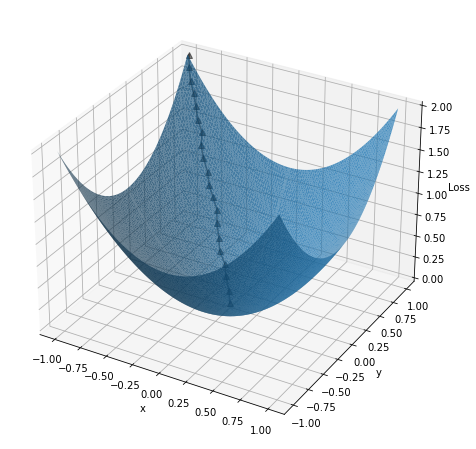

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z =  x**2 + y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True, alpha = 0.8)
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

zline = np.linspace(2, 0, 20)
xline = np.linspace(-1, 0, 20) + np.random.normal(size = 20, loc = 0, scale = 0.01)
yline = np.linspace(1, 0, 20) + np.random.normal(size = 20, loc = 0, scale = 0.01)
ax.plot3D(xline, yline, zline, color = 'black', marker = '^', alpha = 1.5)

# fig.savefig('chapter5_plot3.pdf')

plt.show()

## Loss Function with Optimization Path (large alpha)

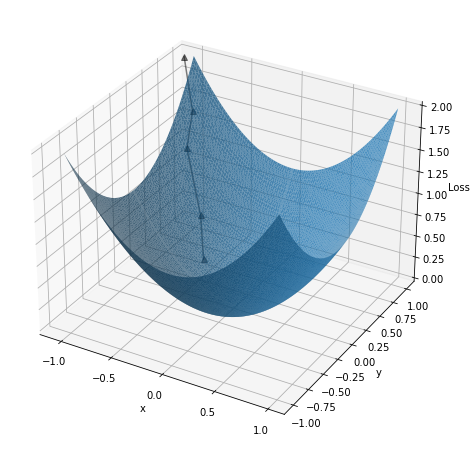

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z =  x**2 + y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True, alpha = 0.8)
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

zline = np.linspace(2, 0, 5)
xline = np.linspace(-1, -0.6, 5) + np.random.normal(size = 5, loc = 0, scale = 0.1)
yline = np.linspace(1, 0.5, 5) + np.random.normal(size = 5, loc = 0, scale = 0.1)
ax.plot3D(xline, yline, zline, color = 'black', marker = '^', alpha = 1.5)

fig.savefig('chapter5_plot4.pdf')

plt.show()

## Loss Function with Optimization Path (optimal value of alpha)

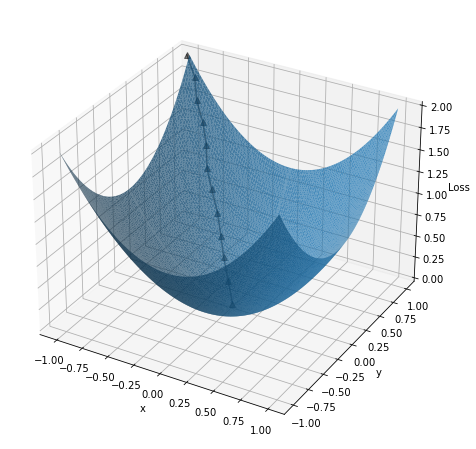

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z =  x**2 + y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True, alpha = 0.8)
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

zline = np.linspace(2, 0, 12)
xline = np.linspace(-1, 0, 12) + np.random.normal(size = 12, loc = 0, scale = 0.01)
yline = np.linspace(1, 0, 12) + np.random.normal(size = 12, loc = 0, scale = 0.01)
ax.plot3D(xline, yline, zline, color = 'black', marker = '^', alpha = 1.5)

# fig.savefig('chapter5_plot5.pdf')

plt.show()

## Hyper-Parameter Optimization

In [1]:
import boto3
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-448'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Chapter6/energy_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
energy = pd.read_csv(file_content_stream)
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,1/11/16 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1/11/16 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,1/11/16 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,1/11/16 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,1/11/16 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Splitting the Data

In [2]:
## Defining the input and target variables
X = energy.drop(columns = ['date', 'Appliances', 'lights', 'rv2'], axis = 1)
Y = energy['rv2']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Standardizing the data
scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

## K-NN Grid Search

In [19]:
## Defining the grid of parameters to be considered
param_grid = {'n_neighbors' : [i for i in range(2, 21)], 'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

## Performing grid search with 5-fold cross validation
knn_grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5).fit(X_train, Y_train)

## Extracting the best estimator
knn_grid_search.best_estimator_

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]})

In [23]:
grid_search.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10)

In [9]:
param_grid = {'n_neighbors' : [i for i in range(2, 21)], 'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
type(ParameterGrid(param_grid))

sklearn.model_selection._search.ParameterGrid

In [2]:
[i for i in range(2, 21)]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## K-NN Random Search

## Support Vector Machine

## Decision Tree

## Neural Networks